In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the dataset
data = pd.read_csv("boston.csv")


In [10]:
# Display the first few rows of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
# Selecting only 8 columns for analysis (e.g., RM, LSTAT, PTRATIO, TAX, NOX, etc.)
df = data[['INDUS','NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]

In [13]:
#DATA PRE-PROCESSING

# Identify missing values in the dataset
print(df.isnull().sum())

# No missing values in the dataset

INDUS      0
NOX        0
RM         0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


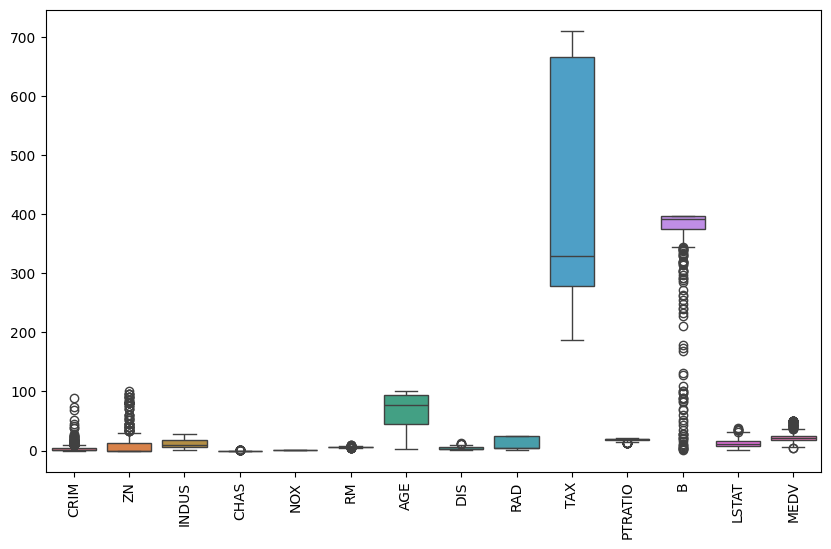

In [14]:
# Detect Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

# B(proportion of Black residents by town),CRIM(CRIM Per capita crime rate by town), ZN(Proportion of residential land zoned for lots over 25,000 sq.ft.)
# shows the most outliers

In [15]:
# Normalize features for better performance:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop("MEDV", axis=1))

In [16]:
# Split data into training and testing sets
X = data.drop("MEDV", axis=1)  # Features
y = data["MEDV"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Exploratory Data Analysis (EDA)
# Checking the basic statistics of the selected columns
print(df.describe())


            INDUS         NOX          RM         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.136779    0.554695    6.284634  408.237154   18.455534   12.653063   
std      6.860353    0.115878    0.702617  168.537116    2.164946    7.141062   
min      0.460000    0.385000    3.561000  187.000000   12.600000    1.730000   
25%      5.190000    0.449000    5.885500  279.000000   17.400000    6.950000   
50%      9.690000    0.538000    6.208500  330.000000   19.050000   11.360000   
75%     18.100000    0.624000    6.623500  666.000000   20.200000   16.955000   
max     27.740000    0.871000    8.780000  711.000000   22.000000   37.970000   

             MEDV  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000  


In [18]:
#FEATURE SELECTION & ENGINEERING

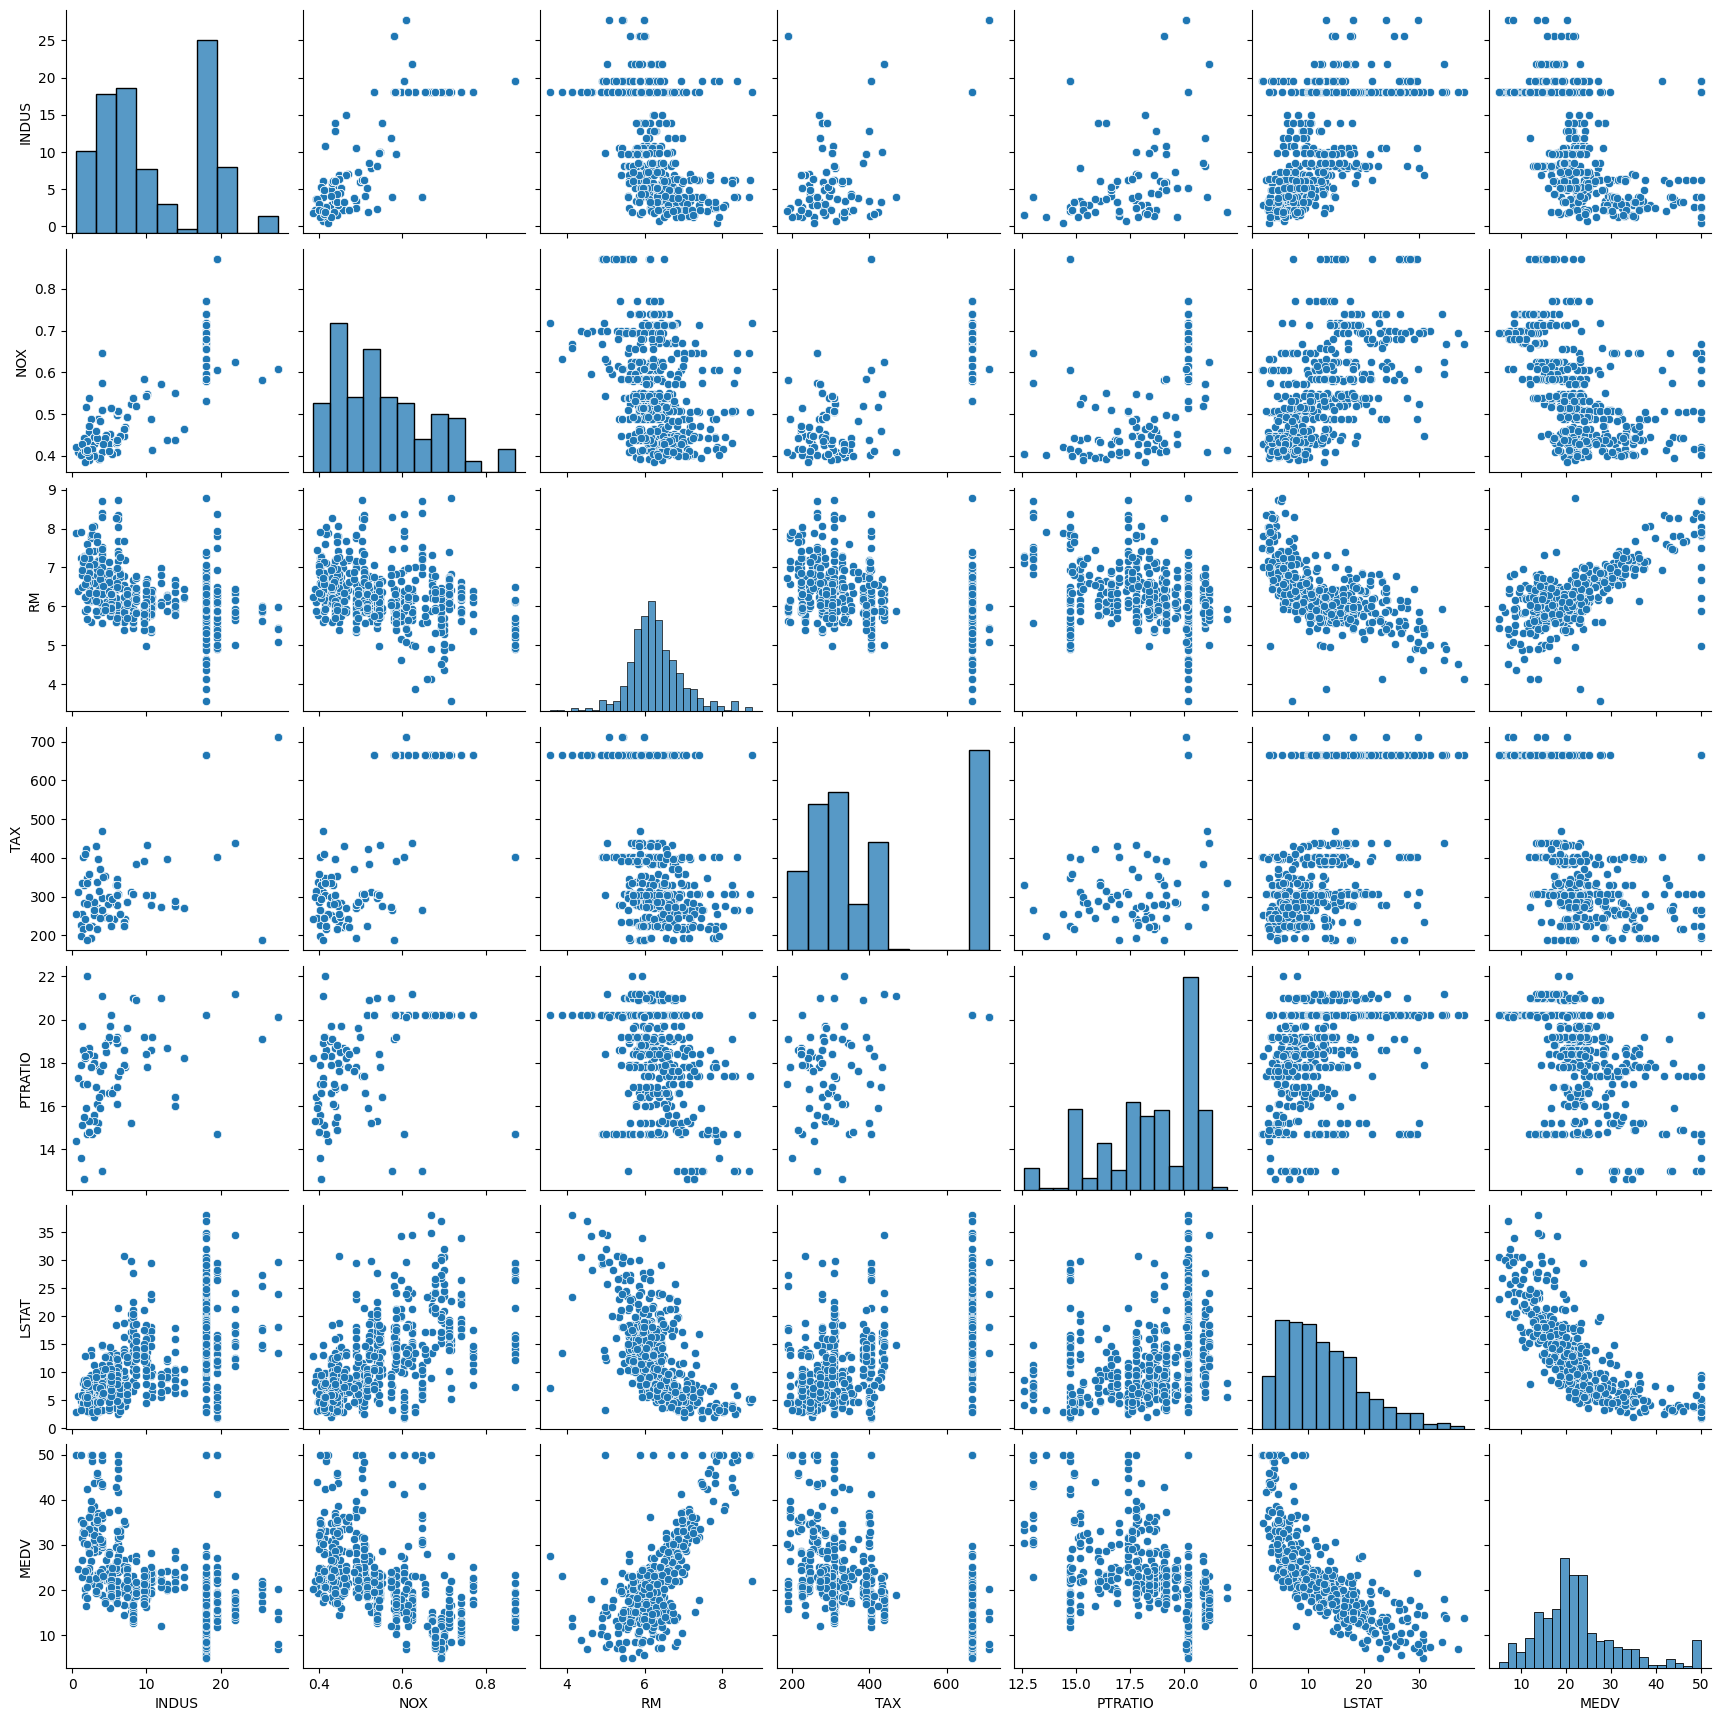

In [19]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(df)
plt.show()

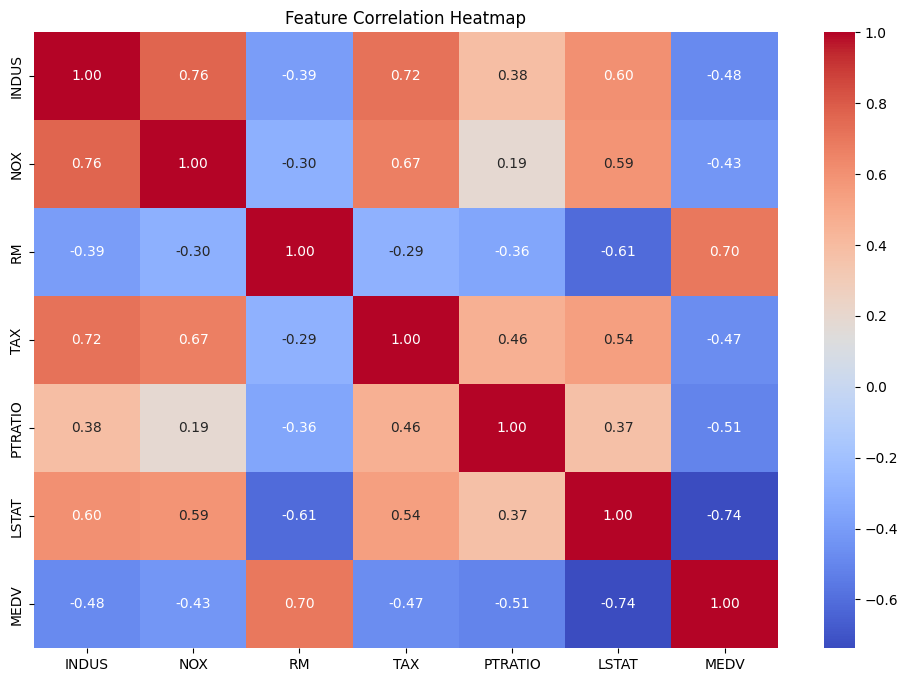

In [20]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
#HYPERTUNING PARAMETER

In [31]:
# hyperparameter grid (RIDGE)
ridge = Ridge()
param_grid = {"alpha": [0.1, 1.0, 10.0, 100.0]}

# Perform Grid Search with Cross-Validation (cv=5)
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best hyperparameter
print("Best Alpha:", grid_search.best_params_)

Best Alpha: {'alpha': 0.1}


In [43]:
# hyperparameter space (LASSO)
lasso = Lasso()
param_dist = {"alpha":[0.1, 1.0, 10.0, 100.0]}

# Perform Random Search with 5 iterations
random_search = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=5, cv=5, scoring="neg_mean_squared_error")
random_search.fit(X_train, y_train)

# Get the best hyperparameter
print("Best Alpha:", random_search.best_params_)

Best Alpha: {'alpha': 0.1}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [50]:
# Define hyperparameter grid
param_grid_elastic = {
    "alpha": [0.1, 1.0, 10.0, 100.0],
    "l1_ratio": [0.1, 0.5, 0.9]  # Mix between L1 (Lasso) and L2 (Ridge)
}

# Initialize Elastic Net model
elastic_net = ElasticNet()

# Perform Grid Search with 5-fold cross-validation
grid_search_elastic = GridSearchCV(elastic_net, param_grid_elastic, cv=5, scoring="neg_mean_squared_error")
grid_search_elastic.fit(X_train, y_train)

# Get the best parameters
best_alpha = grid_search_elastic.best_params_["alpha"]
best_l1_ratio = grid_search_elastic.best_params_["l1_ratio"]

# Train Elastic Net using the best hyperparameters
best_elastic = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic.fit(X_train, y_train)

# Predict on test data
y_pred_elastic = best_elastic.predict(X_test)

print("\nElastic Net Regression (Tuned):")
print(f"Best Alpha: {best_alpha}")
print(f"Best l1 Ratio: {best_l1_ratio}")


Elastic Net Regression (Tuned):
Best Alpha: 0.1
Best l1 Ratio: 0.1


In [ ]:
# TRANING MODELS

In [55]:
# Train model (LINEAR REGRESSION)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Compute RMSE

print("Linear Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred_lin))



Linear Regression:
MSE: 24.291119474973478
RMSE: 4.928602182665332
R² Score: 0.6687594935356326


In [48]:
# Train model (RIDGE REGRESSION)
ridge = Ridge(alpha=0.1)  # Adjust alpha for stronger/weaker regularization
ridge.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)  # Compute RMSE

print("\nRidge Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred_ridge))


Ridge Regression:
MSE: 24.301025500192733
RMSE: 4.929607033039523
R² Score: 0.6686244122021413


In [41]:
# Train model (LASSO REGRESSION)
lasso = Lasso(alpha=0.1)  # Adjust alpha for feature selection strength
lasso.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)  # Compute RMSE

print("\nLasso Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression:
MSE: 25.155593753934173
RMSE: 5.015535241022056
R² Score: 0.6569712802223936


In [51]:
# Train model (ELASTIC NET REGRESSION)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances L1 and L2
elastic_net.fit(X_train, y_train)

# Predict
y_pred_en = elastic_net.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred_en)
rmse = np.sqrt(mse)  # Compute RMSE

print("\nElastic Net Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2_score(y_test, y_pred_en))


Elastic Net Regression:
MSE: 24.43974231649327
RMSE: 4.943656775757523
R² Score: 0.6667328308555568


In [ ]:
#SCATTER PLOTS

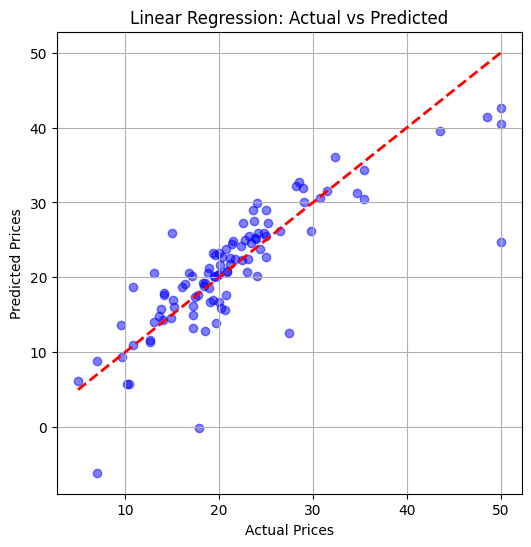

In [56]:
#LINEAR REGRESSION PLOT
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

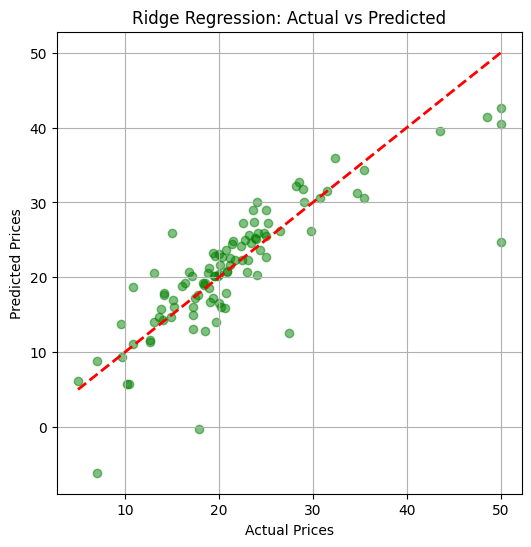

In [58]:
#RIDGE REGRESSION PLOT
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Ridge Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

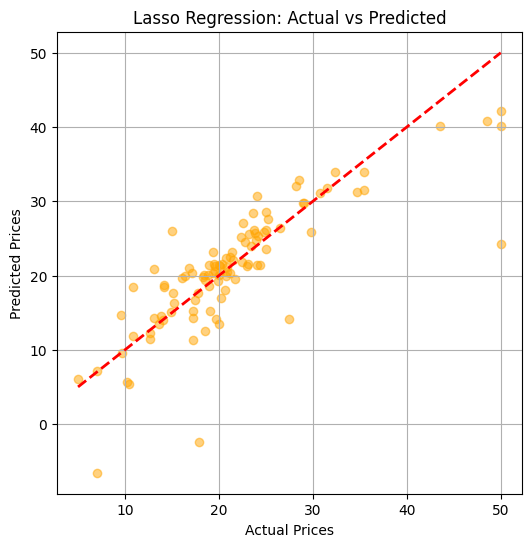

In [59]:
#LASSO REGRESSION PLOT
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

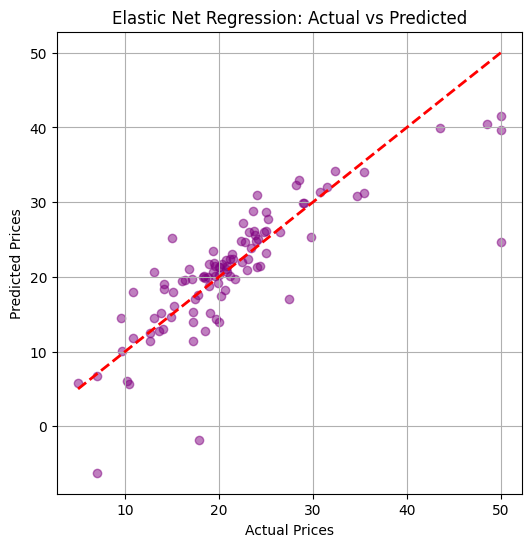

In [60]:
#ELASTIC NET REGRESSION PLOT
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_elastic, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Elastic Net Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
#COMPARE MSE OF MODELS

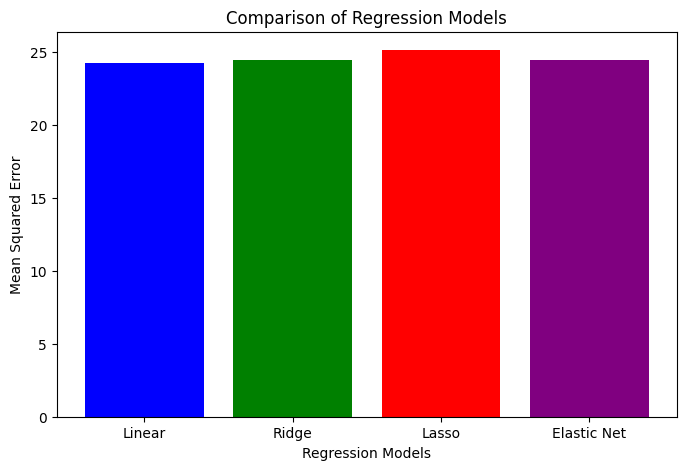

In [42]:
#Comparason of the Models
models = ["Linear", "Ridge", "Lasso", "Elastic Net"]
mse_scores = [mean_squared_error(y_test, y_pred),
              mean_squared_error(y_test, y_pred_ridge),
              mean_squared_error(y_test, y_pred_lasso),
              mean_squared_error(y_test, y_pred_en)]

plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color=["blue", "green", "red", "purple"])
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of Regression Models")
plt.show()
